# ChromoPredict Coumarines
## Estimating Absorption Maxima of Coumarines with ChromoPredict

ChromoPredict implements established rule-based methods for estimating UV-Vis absorption maxima, including:

- **Woodward-Fieser rules** for enones (`woodward`)
- **Fieser rules** for conjugated dienes (`fieser`)
- **Fieser-Kuhn rules** for conjugated polyenes with at least four double bonds (`fieser_kuhn`)

Here we show how to use the extension for coumarines:

- **Woodward-Fieser rules** for coumarines (`woodward_coumarin`)


In [1]:
import rdkit
from rdkit import Chem


In [2]:
import sys, os
import pandas as pd
import numpy as np

sys.path.append('../../Woodward_Fieser_Rules-main/src/')
import chromopredict as cp


In [93]:
d_lit = {
     1: {'smiles': 'C1=CC=C2C(=C1)C=CC(=O)O2', 'nm_exp': 310, 'solvent': 'CCO', 'moltype': 'coumarin'}, # base chromophor
     2: {'smiles': 'C1=CC=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 320, 'solvent': 'CO', 'moltype': 'coumarin'}, #4-Me, 10.1039/FT9938901007 other at 275 nm
     3: {'smiles': 'C1=CC=C2C(=C1)C=C(C)C(=O)O2', 'nm_exp': 312, 'solvent': 'CO', 'moltype': 'coumarin'}, #3-Me, 10.1039/FT9938901007
     4: {'smiles': 'C1=CC=C2C(=C1)C(OC)=CC(=O)O2', 'nm_exp': 323, 'solvent': 'O', 'moltype': 'coumarin'}, #4-MeO, 10.1016/j.phytochem.2021.112861
     5: {'smiles': 'C1=CC=C2C(=C1)C=C(OC)C(=O)O2', 'nm_exp': 340, 'solvent': 'CO', 'moltype': 'coumarin'}, #3-MeO, 10.1002/cplu.201300118
     6: {'smiles': 'C1=CC=C2C(=C1)C(O)=CC(=O)O2', 'nm_exp': 304, 'solvent': 'CCO', 'moltype': 'coumarin'}, #4-OH
     #7: {'smiles': 'C1=CC=C2C(=C1)C=CC(=O)O2', 'nm_exp': 353, 'solvent': 'CO', 'moltype': 'coumarin'}, #3-OH, doesn't exist really
     8: {'smiles': 'C1=CC=C2C(=C1)C(Cl)=CC(=O)O2', 'nm_exp': 314, 'solvent': 'CCCCCC', 'moltype': 'coumarin'}, #4-Cl, 10.1021/j100075a002
     9: {'smiles': 'C1=CC=C2C(=C1)C=C(Cl)C(=O)O2', 'nm_exp': 307, 'solvent': 'CO', 'moltype': 'coumarin'}, #3-Cl, 10.1016/j.molstruc.2019.02.016
    10: {'smiles': 'C1=CC=C2C(=C1)C(Br)=CC(=O)O2', 'nm_exp': 315, 'solvent': 'CO', 'moltype': 'coumarin'}, #4-Br, 10.1039/D0NJ00037J
    11: {'smiles': 'C1=CC=C2C(=C1)C=C(Br)C(=O)O2', 'nm_exp': 290, 'solvent': 'CO', 'moltype': 'coumarin'}, #3-Br, 10.1039/D0NJ00037J
    # di substituted (one in 4 pos)
    12: {'smiles': 'C1=C(O)C=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 342, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,7
    13: {'smiles': 'C1=C(OC)C=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 321, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,7
    14: {'smiles': 'C1=C(OC)C=C2C(=C1)C(O)=CC(=O)O2', 'nm_exp': 303, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,7
    15: {'smiles': 'C1=C(OC)C=C2C(=C1)C(OC)=CC(=O)O2', 'nm_exp': 342, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,7
    16: {'smiles': 'C1=C(O)C=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 323, 'solvent': 'CCO', 'moltype': 'coumarin'}, # 10.1039/C6RA23548D
    
    # all other would be the same in normal woodward rule, so 5 and 6 pos.. though they have different effects
    #12:  {'smiles': 'C1(C)=CC=C2C(=C1)C(C)=C(C)C(=O)O2', 'nm_exp': 318, 'solvent': 'CO', 'moltype': 'coumarin'}, #3,4,6
    #13:  {'smiles': 'C1=C(C)C=C2C(=C1)C(C)=C(C)C(=O)O2', 'nm_exp': 312, 'solvent': 'CO', 'moltype': 'coumarin'}, #3,4,7
    #14:  {'smiles': 'C1=C(C)C=C2C(=C1(C))C(C)=CC(=O)O2', 'nm_exp': 290, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,5,7
    #15:  {'smiles': 'C1(OC(=O)C)=CC=C2C(=C1)C=CC(=O)O2', 'nm_exp': 318, 'solvent': 'CO', 'moltype': 'coumarin'},
    #16:  {'smiles': 'C1=C(OC(=O)C)C=C2C(=C1)C=CC(=O)O2', 'nm_exp': 312, 'solvent': 'CO', 'moltype': 'coumarin'},
    #17:  {'smiles': 'C1(OC(=O)C)=CC=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 318, 'solvent': 'CO', 'moltype': 'coumarin'},
    #18:  {'smiles': 'C1=C(OC(=O)C)C=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 312, 'solvent': 'CO', 'moltype': 'coumarin'},
    #19:  {'smiles': 'C1=C(O)C=C2C(=C1)C(C)=C(C)C(=O)O2', 'nm_exp': 322, 'solvent': 'CO', 'moltype': 'coumarin'},
    #20:  {'smiles': 'C1=CC=C2C(=C1(O))C(C)=CC(=O)O2', 'nm_exp': 296, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,5
    #10: {'smiles': 'C1(O)=CC=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 342, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,6
    #12: {'smiles': 'C1(OC)=CC=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 340, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,6
    #14: {'smiles': 'C1=C(O)C=C2C(=C1(O))C(C)=CC(=O)O2', 'nm_exp': 322, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,5,7
    #15: {'smiles': 'C1(O)=C(O)C=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 345, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,6,7
    #16: {'smiles': 'C1=C(O)C(O)=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 322, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,7,8
    #17: {'smiles': 'C1=C(OC)C=C2C(=C1(OC))C(C)=CC(=O)O2', 'nm_exp': 320, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,5,7
    #18: {'smiles': 'C1(OC)=C(OC)C=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 342, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,6,7
    #19: {'smiles': 'C1=C(OC)C(OC)=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 318, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,7,8
    #20: {'smiles': 'C1=C(C)C=C2C(=C1(O))C(C)=CC(=O)O2', 'nm_exp': 304, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,7,5
    #21: {'smiles': 'C1=C(C)C=C2C(=C1(OC))C(C)=CC(=O)O2', 'nm_exp': 306, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,7,5
    #23: {'smiles': 'C1=CC=C2C(=C1(O))C(O)=CC(=O)O2', 'nm_exp': 292, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,5
    #24: {'smiles': 'C1(O)=CC=C2C(=C1)C(O)=CC(=O)O2', 'nm_exp': 320, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,6
    #24: {'smiles': 'C1=C(O)C=C2C(=C1)C(O)=CC(=O)O2', 'nm_exp': 304, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,6
    #25: {'smiles': 'C1=CC=C2C(=C1(OC))C(O)=CC(=O)O2', 'nm_exp': 294, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,5
    #26: {'smiles': 'C1(OC)=CC=C2C(=C1)C(O)=CC(=O)O2', 'nm_exp': 316, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,6
    #28: {'smiles': 'C1=CC=C2C(=C1(OC))C(OC)=CC(=O)O2', 'nm_exp': 296, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,5
    #29: {'smiles': 'C1(OC)=CC=C2C(=C1)C(OC)=CC(=O)O2', 'nm_exp': 342, 'solvent': 'CO', 'moltype': 'coumarin'}, #4,6 
}

for idx, d_ in d_lit.items():
    smi = d_['smiles']
    if smi != '':
        # employing original Woodward rules
        d_['nm_wfc'], d_['descr_wfc'], _ = cp.predict(smi, solvent=None, verbose=True, draw=False, chromlib='woodward_coumarin')

df_coumarin_lit = pd.DataFrame.from_dict(d_lit, orient='index')
df_coumarin_lit.head(n=11)

,smiles,nm_exp,solvent,moltype,nm_wfc,descr_wfc
1,C1=CC=C2C(=C1)C=CC(=O)O2,310,CCO,coumarin,299,"{'base': 299, 'alpha': 'H', 'alpha_all': [], '..."
2,C1=CC=C2C(=C1)C(C)=CC(=O)O2,320,CO,coumarin,317,"{'base': 299, 'alpha': 'H', 'alpha_all': [], '..."
3,C1=CC=C2C(=C1)C=C(C)C(=O)O2,312,CO,coumarin,310,"{'base': 299, 'alpha': 'alkyl', 'alpha_all': [..."
4,C1=CC=C2C(=C1)C(OC)=CC(=O)O2,323,O,coumarin,321,"{'base': 299, 'alpha': 'H', 'alpha_all': [], '..."
5,C1=CC=C2C(=C1)C=C(OC)C(=O)O2,340,CO,coumarin,327,"{'base': 299, 'alpha': 'alkoxy', 'alpha_all': ..."
6,C1=CC=C2C(=C1)C(O)=CC(=O)O2,304,CCO,coumarin,313,"{'base': 299, 'alpha': 'H', 'alpha_all': [], '..."
8,C1=CC=C2C(=C1)C(Cl)=CC(=O)O2,314,CCCCCC,coumarin,321,"{'base': 299, 'alpha': 'H', 'alpha_all': [], '..."
9,C1=CC=C2C(=C1)C=C(Cl)C(=O)O2,307,CO,coumarin,327,"{'base': 299, 'alpha': 'chloro', 'alpha_all': ..."
10,C1=CC=C2C(=C1)C(Br)=CC(=O)O2,315,CO,coumarin,332,"{'base': 299, 'alpha': 'H', 'alpha_all': [], '..."
11,C1=CC=C2C(=C1)C=C(Br)C(=O)O2,290,CO,coumarin,337,"{'base': 299, 'alpha': 'bromo', 'alpha_all': [..."


In [94]:
df_tmp = df_coumarin_lit[['moltype', 'smiles', 'solvent', 'nm_exp', 'nm_wfc', 'descr_wfc']]

contrib_expanded = df_tmp['descr_wfc'].apply(pd.Series)
df_coumarines = pd.concat([df_tmp.drop(columns='descr_wfc'), contrib_expanded], axis=1)
df_coumarines['Nsub'] = df_coumarines.apply(
    lambda row: len(row['alpha_all']) + len(row['beta_all']),
    axis=1
)

df_coumarines.head(n=5)

,moltype,smiles,solvent,nm_exp,nm_wfc,base,alpha,alpha_all,beta,beta_all,gamma,gamma_all,higher,higher_all,solvent,Nsub
1,coumarin,C1=CC=C2C(=C1)C=CC(=O)O2,CCO,310,299,299,H,[],H,[],H,[],H,[],0,0
2,coumarin,C1=CC=C2C(=C1)C(C)=CC(=O)O2,CO,320,317,299,H,[],alkyl,"[{'pattern': 'alkyl', 'value': 18, 'sub_type':...",H,[],H,[],0,1
3,coumarin,C1=CC=C2C(=C1)C=C(C)C(=O)O2,CO,312,310,299,alkyl,"[{'pattern': 'alkyl', 'value': 11, 'sub_type':...",H,[],H,[],H,[],0,1
4,coumarin,C1=CC=C2C(=C1)C(OC)=CC(=O)O2,O,323,321,299,H,[],alkoxy,"[{'pattern': 'alkoxy', 'value': 22, 'sub_type'...",H,[],H,[],0,1
5,coumarin,C1=CC=C2C(=C1)C=C(OC)C(=O)O2,CO,340,327,299,alkoxy,"[{'pattern': 'alkoxy', 'value': 28, 'sub_type'...",H,[],H,[],H,[],0,1


In [95]:
df_4fit_wf = df_coumarines[['moltype', 'smiles', 'solvent', 'nm_exp', 'nm_wfc', 'alpha', 'beta', 'gamma', 'higher', 'Nsub']]

df_4fit_wf = df_4fit_wf.copy()
df_4fit_wf['base'] = df_4fit_wf['moltype'] #+ '_' + df_4fit_wf['stereo_type']

df_4fit_wf.head(n=35)

,moltype,smiles,solvent,solvent,nm_exp,nm_wfc,alpha,beta,gamma,higher,Nsub,base
1,coumarin,C1=CC=C2C(=C1)C=CC(=O)O2,CCO,0,310,299,H,H,H,H,0,coumarin
2,coumarin,C1=CC=C2C(=C1)C(C)=CC(=O)O2,CO,0,320,317,H,alkyl,H,H,1,coumarin
3,coumarin,C1=CC=C2C(=C1)C=C(C)C(=O)O2,CO,0,312,310,alkyl,H,H,H,1,coumarin
4,coumarin,C1=CC=C2C(=C1)C(OC)=CC(=O)O2,O,0,323,321,H,alkoxy,H,H,1,coumarin
5,coumarin,C1=CC=C2C(=C1)C=C(OC)C(=O)O2,CO,0,340,327,alkoxy,H,H,H,1,coumarin
6,coumarin,C1=CC=C2C(=C1)C(O)=CC(=O)O2,CCO,0,304,313,H,hydroxy,H,H,1,coumarin
8,coumarin,C1=CC=C2C(=C1)C(Cl)=CC(=O)O2,CCCCCC,0,314,321,H,chloro,H,H,1,coumarin
9,coumarin,C1=CC=C2C(=C1)C=C(Cl)C(=O)O2,CO,0,307,327,chloro,H,H,H,1,coumarin
10,coumarin,C1=CC=C2C(=C1)C(Br)=CC(=O)O2,CO,0,315,332,H,bromo,H,H,1,coumarin
11,coumarin,C1=CC=C2C(=C1)C=C(Br)C(=O)O2,CO,0,290,337,bromo,H,H,H,1,coumarin


In [96]:
# One-hot encode features
X_base = pd.get_dummies(df_4fit_wf['base'], prefix='base') #base
X_alpha = pd.get_dummies(df_4fit_wf['alpha'], prefix='alpha')
X_beta = pd.get_dummies(df_4fit_wf['beta'], prefix='beta')
X_gamma = pd.get_dummies(df_4fit_wf['gamma'], prefix='gamma')
X_higher = pd.get_dummies(df_4fit_wf['higher'], prefix='higher')

# Combine into one feature matrix
X = pd.concat([X_base, X_alpha, X_beta, X_gamma, X_higher], axis=1)
y = df_4fit_wf['nm_exp']

feature_names = X.columns.tolist()

In [97]:
initial_guesses = {
    'base_coumarin': 299,
    
    # Alpha substituent increments (default = 0, unless known)
    'alpha_H': 0,
    'alpha_alkoxy': 35,
    'alpha_alkyl': 10,
    'alpha_bromo': 25,
    'alpha_chloro': 15,
    'alpha_hydroxy': 35,
    
    # Beta substituent increments (usually less than alpha)
    'beta_H': 0,
    'beta_alkoxy': 30,
    'beta_alkyl': 12,
    'beta_bromo': 30,
    'beta_chloro': 12,
    'beta_hydroxy': 30
}

x0 = np.array([initial_guesses.get(f, 0) for f in feature_names])
x0

array([299,   0,  35,  10,  25,  15,   0,  30,  12,  30,  12,  30,   0,
         0,   0,   0])

In [ ]:
from scipy.optimize import dual_annealing
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define Loss Function
def integer_loss_fn(coefs):
    coefs_int = np.round(coefs)
    pred = X @ coefs_int
    return mean_absolute_error(pred, y) #np.sum(np.abs(pred - y))

# Define bounds
bounds = []
for f in feature_names:
    if f in ['alpha_H', 'beta_H', 'gamma_H', 'higher_H']:
        bounds.append((0, 0.001))
    elif 'base' in f:
        bounds.append((200, 350))
    else:
        bounds.append((-100, 100))

# Run optimization multiple times and keep the best result
n_runs = 100
best_loss = float('inf')
best_coefs = None

for i in range(n_runs):
    result = dual_annealing(integer_loss_fn, bounds)
    rounded = np.round(result.x).astype(int)
    loss = integer_loss_fn(rounded)
    
    if loss < best_loss:
        best_loss = loss
        best_coefs = rounded

    print('Iteration: '+str(i)+', MAE: '+str(best_loss))

# Convert best coefficients to pandas Series
fitted_series_best = pd.Series(best_coefs, index=feature_names)

print("Best loss:", best_loss)
print("Best coefficients:")

In [ ]:
fitted_series = fitted_series_best
fitted_series

In [90]:
def get_value(row, col_prefix):
    key = f"{col_prefix}_{row[col_prefix]}"
    #print(key)
    return fitted_series.get(key, 0)

df_4fit_wf['alpha_val'] = df_4fit_wf.apply(lambda row: get_value(row, 'alpha'), axis=1)
df_4fit_wf['beta_val']  = df_4fit_wf.apply(lambda row: get_value(row, 'beta'), axis=1)
df_4fit_wf['gamma_val']  = df_4fit_wf.apply(lambda row: get_value(row, 'gamma'), axis=1)
df_4fit_wf['higher_val']  = df_4fit_wf.apply(lambda row: get_value(row, 'higher'), axis=1)
df_4fit_wf['base_val']  = df_4fit_wf.apply(lambda row: get_value(row, 'base'), axis=1)

df_4fit_wf['nm_wfc_refine'] = df_4fit_wf['alpha_val'] + df_4fit_wf['beta_val'] + df_4fit_wf['higher_val'] + df_4fit_wf['gamma_val'] + df_4fit_wf['base_val']
df_4fit_wf.head(n=10)

,moltype,smiles,solvent,solvent,nm_exp,nm_wfc,alpha,beta,gamma,higher,Nsub,base,alpha_val,beta_val,gamma_val,higher_val,base_val,nm_wfc_refine
1,coumarin,C1=CC=C2C(=C1)C=CC(=O)O2,CCO,0,310,299,H,H,H,H,0,coumarin,0,0,0,0,330,330
2,coumarin,C1=CC=C2C(=C1)C(C)=CC(=O)O2,CO,0,320,317,H,alkyl,H,H,1,coumarin,0,-10,0,0,330,320
3,coumarin,C1=CC=C2C(=C1)C=C(C)C(=O)O2,CO,0,312,310,alkyl,H,H,H,1,coumarin,-18,0,0,0,330,312
4,coumarin,C1=CC=C2C(=C1)C(OC)=CC(=O)O2,O,0,323,321,H,alkoxy,H,H,1,coumarin,0,9,0,0,330,339
5,coumarin,C1=CC=C2C(=C1)C=C(OC)C(=O)O2,CO,0,340,327,alkoxy,H,H,H,1,coumarin,10,0,0,0,330,340
6,coumarin,C1=CC=C2C(=C1)C(O)=CC(=O)O2,CCO,0,304,313,H,hydroxy,H,H,1,coumarin,0,-28,0,0,330,302
8,coumarin,C1=CC=C2C(=C1)C(Cl)=CC(=O)O2,CCCCCC,0,314,321,H,chloro,H,H,1,coumarin,0,-16,0,0,330,314
9,coumarin,C1=CC=C2C(=C1)C=C(Cl)C(=O)O2,CO,0,307,327,chloro,H,H,H,1,coumarin,-23,0,0,0,330,307
10,coumarin,C1=CC=C2C(=C1)C(Br)=CC(=O)O2,CO,0,315,332,H,bromo,H,H,1,coumarin,0,-15,0,0,330,315
11,coumarin,C1=C(O)C=C2C(=C1)C(C)=CC(=O)O2,CO,0,342,317,H,alkyl,H,hydroxy,1,coumarin,0,-10,0,14,330,334


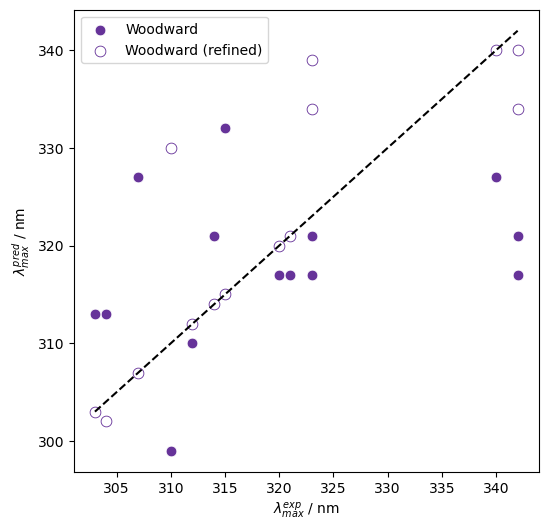

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

sns.scatterplot(
    data=df_4fit_wf,
    x='nm_exp',
    y='nm_wfc',
    marker='o',
    color='rebeccapurple',
    s=60,
    label='Woodward'
)

# Plot hollow circles for 'nm_wfe'
sns.scatterplot(
    data=df_4fit_wf,
    x='nm_exp',
    y='nm_wfc_refine',
    marker='o',
    facecolors='white',
    edgecolor='rebeccapurple',
    s=60,
    label='Woodward (refined)'
)

# Add identity line for reference
plt.plot([df_4fit_wf['nm_exp'].min(), df_4fit_wf['nm_exp'].max()],
         [df_4fit_wf['nm_exp'].min(), df_4fit_wf['nm_exp'].max()],
         'k--', label='y = x')

plt.xlabel('$\lambda_{max}^{exp}$ / nm')
plt.ylabel('$\lambda_{max}^{pred}$ / nm')

#plt.show()
plt.savefig('WF_vs_WFR_coumarines.png')

# Crosscheck with calculations

In [50]:
def unpack_data(df, full=False):
    # Constants
    HARTREE_TO_EV = 27.2116
    EV_TO_NM = 1239.841984  # Planck constant * speed of light in nm·eV

    # Function to convert string to list of floats
    def parse_str_array(s):
        s = s.strip("[]").replace("\n", " ")  # Remove brackets and newline
        return [float(x) for x in s.split()]
    
    # Apply the parsing function
    df['eigenvalues'] = df['eigenvalues'].apply(parse_str_array)
    df['oscillator_strengths'] = df['oscillator_strengths'].apply(parse_str_array)

    # Now unpack and convert
    for i in range(10):
        # Extract raw eigenvalue
        df[f'E{i+1}'] = df['eigenvalues'].apply(lambda x: x[i]) * HARTREE_TO_EV
        df[f'f{i+1}'] = df['oscillator_strengths'].apply(lambda x: x[i])
        df[f'nm{i+1}'] = df[f'E{i+1}'].apply(lambda x: round(EV_TO_NM / x,1) if x != 0 else np.nan)

    if not full:    
        df = df.drop(columns=['eigenvalues', 'oscillator_strengths'])
    
    return df
    
def load_ref_data(path, category, func='b3lyp', full=True):

    df_raw = pd.read_csv(path)
    df_unpack = unpack_data(df_raw, full=full)
    df_unpack['solvent'] = None
    df_unpack['moltype'] = category

    if full:
        df_use = df_unpack
    else:
        df_use = df_unpack[['smiles', 'moltype', 'solvent', 'nm1']].rename(columns={'nm1': 'nm_'+str(func)})

    return df_use
    

In [51]:
df_H1 = load_ref_data('opt_coumarin/data_b3lyp_H1_calc_1v1.csv', func='b3lyp', category='coumarin', full=False)
df_H1_beta = load_ref_data('opt_coumarin/data_b3lyp_H1_beta_calc_5v5.csv', func='b3lyp', category='coumarin', full=False)
df_H1_alpha = load_ref_data('opt_coumarin/data_b3lyp_H1_alpha_calc_5v5.csv', func='b3lyp', category='coumarin', full=False)
df_H1_alpha_beta = load_ref_data('opt_coumarin/data_b3lyp_H1_alpha_beta_calc_25v25.csv', func='b3lyp', category='coumarin', full=False)

df_coumarines = pd.concat([df_H1, df_H1_beta, df_H1_alpha, df_H1_alpha_beta], axis=0)
df_coumarines_clean = df_coumarines.drop_duplicates(subset='smiles')
df_coumarines_clean.count()


smiles      36
moltype     36
solvent      0
nm_b3lyp    36
dtype: int64

In [52]:
df_coumarines_clean.head(n=35)

,smiles,moltype,solvent,nm_b3lyp
0,C1=CC=C2C(=C1)C=CC(=O)O2,coumarin,None,298.6
0,C1=CC=C2C(=C1)C(OC)=CC(=O)O2,coumarin,None,285.2
1,C1=CC=C2C(=C1)C(O)=CC(=O)O2,coumarin,None,288.5
2,C1=CC=C2C(=C1)C(Cl)=CC(=O)O2,coumarin,None,302.2
3,C1=CC=C2C(=C1)C(Br)=CC(=O)O2,coumarin,None,303.2
4,C1=CC=C2C(=C1)C(C)=CC(=O)O2,coumarin,None,295.6
0,C1=CC=C2C(=C1)C=C(OC)C(=O)O2,coumarin,None,292.7
1,C1=CC=C2C(=C1)C=C(O)C(=O)O2,coumarin,None,293.8
2,C1=CC=C2C(=C1)C=C(Cl)C(=O)O2,coumarin,None,303.8
3,C1=CC=C2C(=C1)C=C(Br)C(=O)O2,coumarin,None,307.5


In [53]:
def add_wf_predict(df):

    nm_wfr = []
    img_wfr = []
    contrib_wfr = []
    
    for i, row in df.iterrows():
        smi = row['smiles']
        solv = row['solvent']

        # woodward refine
        nm, d_contrib, img = cp.predict(smi, solvent=None, verbose=True, draw=False, chromlib='woodward_coumarin')
        #print(i, smi, nm)
        nm_wfr.append(nm)
        contrib_wfr.append(d_contrib)
        img_wfr.append(img)
        
        
    df['nm_wfc'] = nm_wfr
    df['descr_wfc'] = contrib_wfr
    df['img_wfc'] = img_wfr
    


In [54]:
add_wf_predict(df_coumarines_clean)
df_coumarines_clean.head(n=36)

,smiles,moltype,solvent,nm_b3lyp,nm_wfc,descr_wfc,img_wfc
0,C1=CC=C2C(=C1)C=CC(=O)O2,coumarin,None,298.6,299,"{'base': 299, 'alpha': 'H', 'alpha_all': [], '...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
0,C1=CC=C2C(=C1)C(OC)=CC(=O)O2,coumarin,None,285.2,321,"{'base': 299, 'alpha': 'H', 'alpha_all': [], '...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
1,C1=CC=C2C(=C1)C(O)=CC(=O)O2,coumarin,None,288.5,313,"{'base': 299, 'alpha': 'H', 'alpha_all': [], '...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
2,C1=CC=C2C(=C1)C(Cl)=CC(=O)O2,coumarin,None,302.2,321,"{'base': 299, 'alpha': 'H', 'alpha_all': [], '...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,C1=CC=C2C(=C1)C(Br)=CC(=O)O2,coumarin,None,303.2,332,"{'base': 299, 'alpha': 'H', 'alpha_all': [], '...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,C1=CC=C2C(=C1)C(C)=CC(=O)O2,coumarin,None,295.6,317,"{'base': 299, 'alpha': 'H', 'alpha_all': [], '...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
0,C1=CC=C2C(=C1)C=C(OC)C(=O)O2,coumarin,None,292.7,327,"{'base': 299, 'alpha': 'alkoxy', 'alpha_all': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
1,C1=CC=C2C(=C1)C=C(O)C(=O)O2,coumarin,None,293.8,337,"{'base': 299, 'alpha': 'hydroxy', 'alpha_all':...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
2,C1=CC=C2C(=C1)C=C(Cl)C(=O)O2,coumarin,None,303.8,327,"{'base': 299, 'alpha': 'chloro', 'alpha_all': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,C1=CC=C2C(=C1)C=C(Br)C(=O)O2,coumarin,None,307.5,337,"{'base': 299, 'alpha': 'bromo', 'alpha_all': [...",<PIL.PngImagePlugin.PngImageFile image mode=RG...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


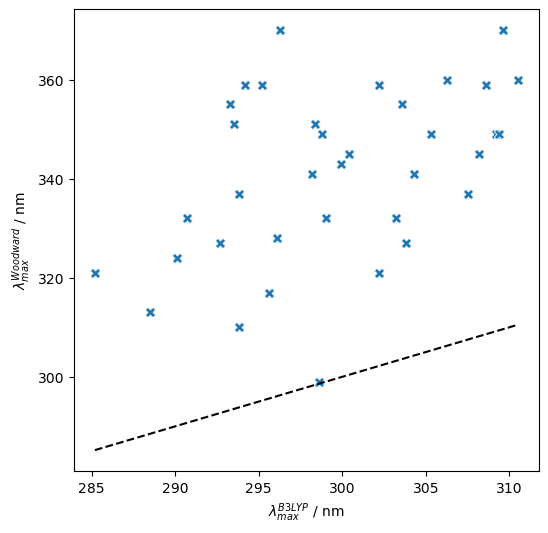

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Create the plot
ax = sns.scatterplot(
    data=df_coumarines_clean,
    x='nm_b3lyp',
    y='nm_wfc',
    #hue='stereo_mismatch',
    #palette={0: 'white', 1: 'thistle'},
    #edgecolor='black',
    #style='stereo_mismatch',
    marker='X',
    s=55,
)

# Customize legend labels
new_labels = ['stereo match', 'stereo mismatch']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=new_labels, title=None, frameon=False)


# Add identity line for reference
plt.plot([df_coumarines_clean['nm_b3lyp'].min(), df_coumarines_clean['nm_b3lyp'].max()],
         [df_coumarines_clean['nm_b3lyp'].min(), df_coumarines_clean['nm_b3lyp'].max()],
         'k--', label='y = x')


plt.xlabel('$\lambda_{max}^{B3LYP}$ / nm')
plt.ylabel('$\lambda_{max}^{Woodward}$ / nm')

plt.savefig('WF_vs_WFR_enones_stereo.png')

In [56]:
subset_df = df_coumarines_clean[abs(df_coumarines_clean['nm_b3lyp'] - df_coumarines_clean['nm_wfc']) < 10]
subset_df

,smiles,moltype,solvent,nm_b3lyp,nm_wfc,descr_wfc,img_wfc
0,C1=CC=C2C(=C1)C=CC(=O)O2,coumarin,None,298.6,299,"{'base': 299, 'alpha': 'H', 'alpha_all': [], '...",<PIL.PngImagePlugin.PngImageFile image mode=RG...


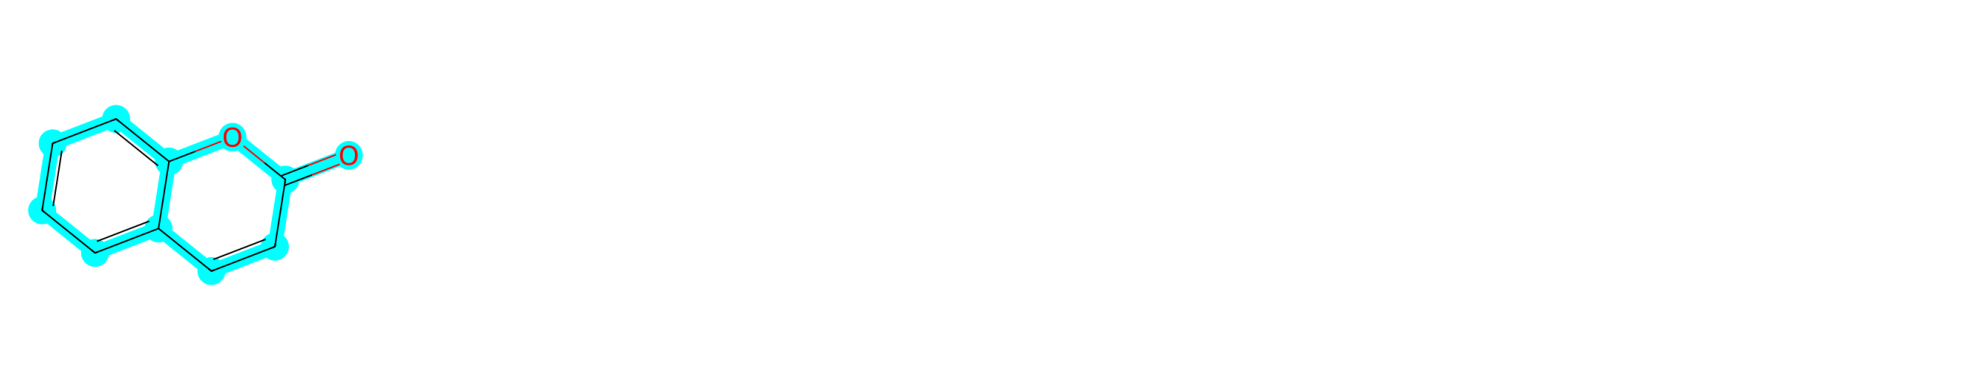

In [57]:
import matplotlib.pyplot as plt

# Number of images
num_images = len(subset_df)
# Number of columns
cols = 5
# Number of rows (ceil division)
rows = -(-num_images // cols)  # same as math.ceil(num_images / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Flatten axes array for easy indexing, even if it's 1D
axes = axes.flatten()

# Plot each image
for i, (ax, img) in enumerate(zip(axes, subset_df['img_wfc'])):
    ax.imshow(img)
    ax.axis('off')

# Turn off unused axes (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [58]:
subset_df_large = df_coumarines_clean[abs(df_coumarines_clean['nm_b3lyp'] - df_coumarines_clean['nm_wfc']) > 10]
subset_df_large.count()

smiles       35
moltype      35
solvent       0
nm_b3lyp     35
nm_wfc       35
descr_wfc    35
img_wfc      35
dtype: int64

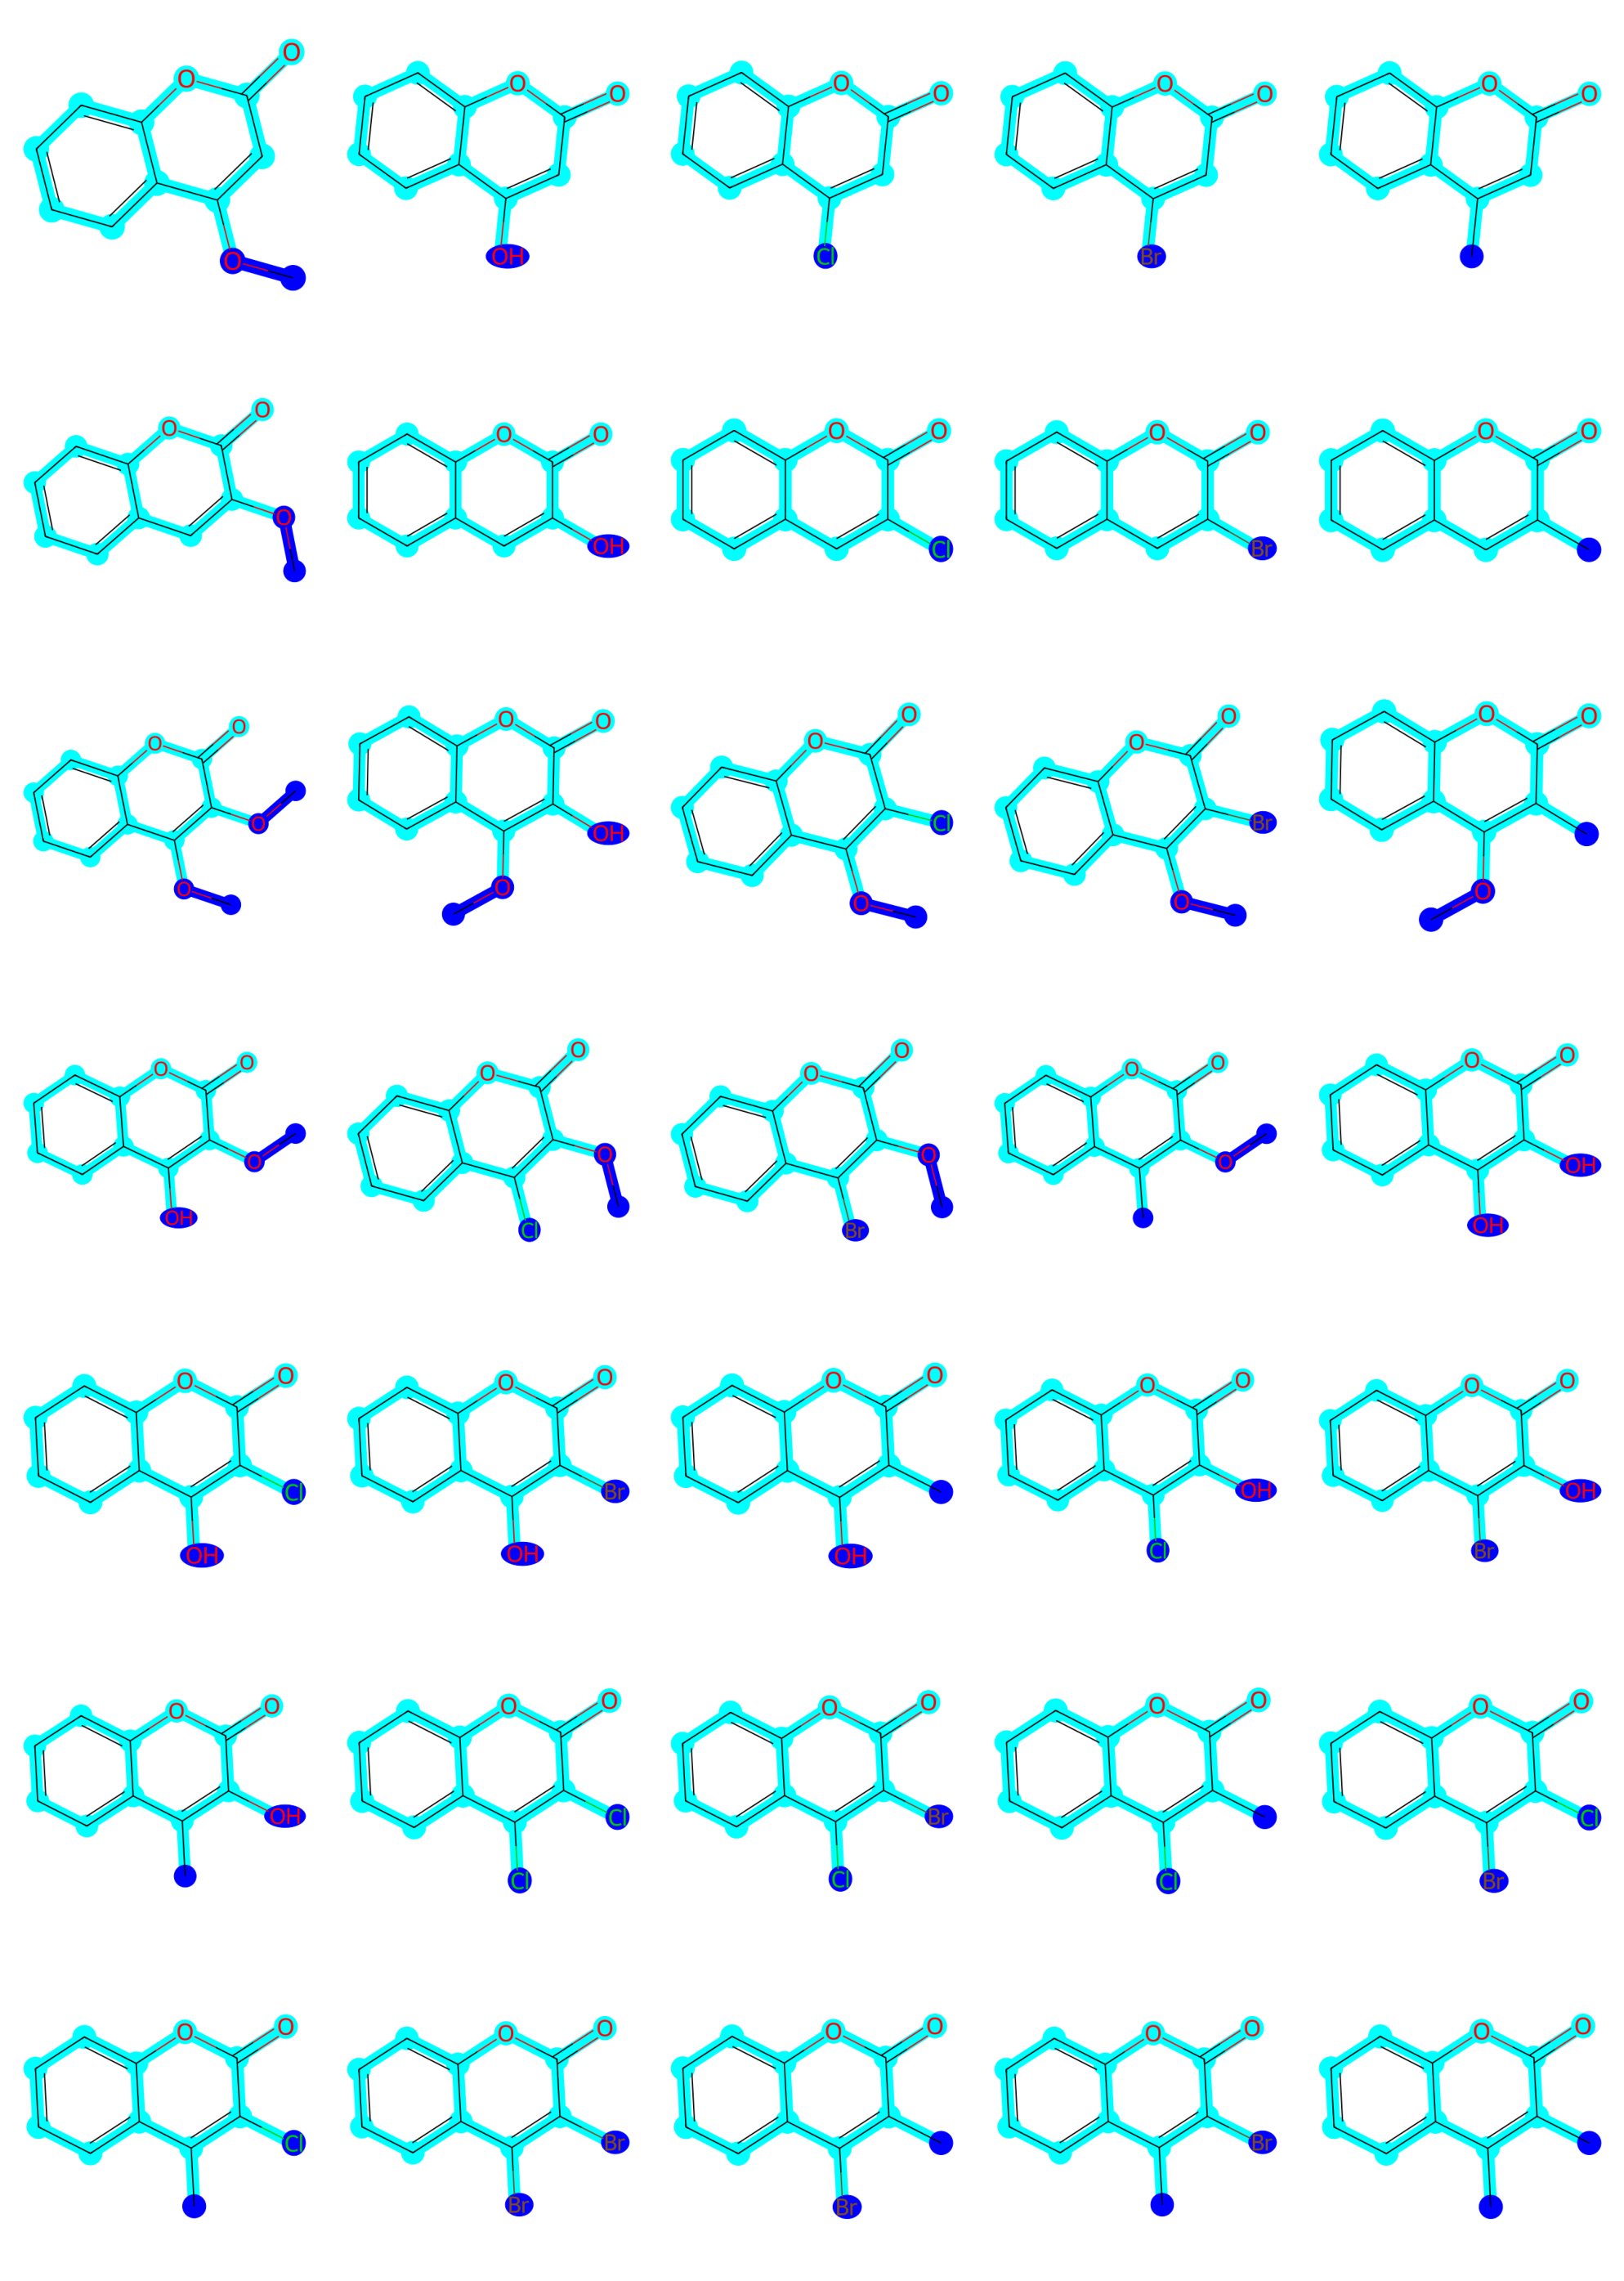

In [59]:
import matplotlib.pyplot as plt

# Number of images
num_images = len(subset_df_large)
# Number of columns
cols = 5
# Number of rows (ceil division)
rows = -(-num_images // cols)  # same as math.ceil(num_images / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Flatten axes array for easy indexing, even if it's 1D
axes = axes.flatten()

# Plot each image
for i, (ax, img) in enumerate(zip(axes, subset_df_large['img_wfc'])):
    ax.imshow(img)
    ax.axis('off')

# Turn off unused axes (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [60]:
df_tmp = df_coumarines_clean[['moltype', 'smiles', 'solvent', 'nm_b3lyp', 'nm_wfc', 'descr_wfc']]

contrib_expanded = df_tmp['descr_wfc'].apply(pd.Series)
df_coumarines = pd.concat([df_tmp.drop(columns='descr_wfc'), contrib_expanded], axis=1)
df_coumarines['Nsub'] = df_coumarines.apply(
    lambda row: len(row['alpha_all']) + len(row['beta_all']),
    axis=1
)

df_coumarines.head(n=5)

,moltype,smiles,solvent,nm_b3lyp,nm_wfc,base,alpha,alpha_all,beta,beta_all,gamma,gamma_all,higher,higher_all,solvent,Nsub
0,coumarin,C1=CC=C2C(=C1)C=CC(=O)O2,None,298.6,299,299,H,[],H,[],H,[],H,[],0,0
0,coumarin,C1=CC=C2C(=C1)C(OC)=CC(=O)O2,None,285.2,321,299,H,[],alkoxy,"[{'pattern': 'alkoxy', 'value': 22, 'sub_type'...",H,[],H,[],0,1
1,coumarin,C1=CC=C2C(=C1)C(O)=CC(=O)O2,None,288.5,313,299,H,[],hydroxy,"[{'pattern': 'hydroxy', 'value': 14, 'sub_type...",H,[],H,[],0,1
2,coumarin,C1=CC=C2C(=C1)C(Cl)=CC(=O)O2,None,302.2,321,299,H,[],chloro,"[{'pattern': 'chloro', 'value': 22, 'sub_type'...",H,[],H,[],0,1
3,coumarin,C1=CC=C2C(=C1)C(Br)=CC(=O)O2,None,303.2,332,299,H,[],bromo,"[{'pattern': 'bromo', 'value': 33, 'sub_type':...",H,[],H,[],0,1


In [61]:
df_4fit_wf = df_coumarines[['moltype', 'smiles', 'nm_b3lyp', 'nm_wfc', 'alpha', 'beta', 'Nsub']]

df_4fit_wf = df_4fit_wf.copy()
df_4fit_wf['base'] = df_4fit_wf['moltype'] #+ '_' + df_4fit_wf['stereo_type']

df_4fit_wf.head(n=35)

,moltype,smiles,nm_b3lyp,nm_wfc,alpha,beta,Nsub,base
0,coumarin,C1=CC=C2C(=C1)C=CC(=O)O2,298.6,299,H,H,0,coumarin
0,coumarin,C1=CC=C2C(=C1)C(OC)=CC(=O)O2,285.2,321,H,alkoxy,1,coumarin
1,coumarin,C1=CC=C2C(=C1)C(O)=CC(=O)O2,288.5,313,H,hydroxy,1,coumarin
2,coumarin,C1=CC=C2C(=C1)C(Cl)=CC(=O)O2,302.2,321,H,chloro,1,coumarin
3,coumarin,C1=CC=C2C(=C1)C(Br)=CC(=O)O2,303.2,332,H,bromo,1,coumarin
4,coumarin,C1=CC=C2C(=C1)C(C)=CC(=O)O2,295.6,317,H,alkyl,1,coumarin
0,coumarin,C1=CC=C2C(=C1)C=C(OC)C(=O)O2,292.7,327,alkoxy,H,1,coumarin
1,coumarin,C1=CC=C2C(=C1)C=C(O)C(=O)O2,293.8,337,hydroxy,H,1,coumarin
2,coumarin,C1=CC=C2C(=C1)C=C(Cl)C(=O)O2,303.8,327,chloro,H,1,coumarin
3,coumarin,C1=CC=C2C(=C1)C=C(Br)C(=O)O2,307.5,337,bromo,H,1,coumarin


In [62]:
# One-hot encode features
X_base = pd.get_dummies(df_4fit_wf['base'], prefix='base') #base
X_alpha = pd.get_dummies(df_4fit_wf['alpha'], prefix='alpha')
X_beta = pd.get_dummies(df_4fit_wf['beta'], prefix='beta')

# Combine into one feature matrix
X = pd.concat([X_base, X_alpha, X_beta], axis=1)
y = df_4fit_wf['nm_b3lyp']

feature_names = X.columns.tolist()

In [63]:
initial_guesses = {
    'base_coumarin': 299,
    
    # Alpha substituent increments (default = 0, unless known)
    'alpha_H': 0,
    'alpha_alkoxy': 35,
    'alpha_alkyl': 10,
    'alpha_bromo': 25,
    'alpha_chloro': 15,
    'alpha_hydroxy': 35,
    
    # Beta substituent increments (usually less than alpha)
    'beta_H': 0,
    'beta_alkoxy': 30,
    'beta_alkyl': 12,
    'beta_bromo': 30,
    'beta_chloro': 12,
    'beta_hydroxy': 30
}

x0 = np.array([initial_guesses.get(f, 0) for f in feature_names])
x0

array([299,   0,  35,  10,  25,  15,  35,   0,  30,  12,  30,  12,  30])

In [64]:
from scipy.optimize import dual_annealing
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define Loss Function
def integer_loss_fn(coefs):
    coefs_int = np.round(coefs)
    pred = X @ coefs_int
    return mean_absolute_error(pred, y) #np.sum(np.abs(pred - y))

# Define bounds
bounds = []
for f in feature_names:
    if f in ['alpha_H', 'beta_H']:
        bounds.append((0, 0.001))
    elif 'base' in f:
        bounds.append((200, 350))
    else:
        bounds.append((1, 100))

# Run optimization multiple times and keep the best result
n_runs = 100
best_loss = float('inf')
best_coefs = None

for i in range(n_runs):
    result = dual_annealing(integer_loss_fn, bounds)
    rounded = np.round(result.x).astype(int)
    loss = integer_loss_fn(rounded)
    
    if loss < best_loss:
        best_loss = loss
        best_coefs = rounded

    print('Iteration: '+str(i)+', MAE: '+str(best_loss))

# Convert best coefficients to pandas Series
fitted_series_best = pd.Series(best_coefs, index=feature_names)

print("Best loss:", best_loss)
print("Best coefficients:")

KeyboardInterrupt: 

In [ ]:
fitted_series = fitted_series_best
fitted_series

In [ ]:
def get_value(row, col_prefix):
    key = f"{col_prefix}_{row[col_prefix]}"
    #print(key)
    return fitted_series.get(key, 0)

df_4fit_wf['alpha_val'] = df_4fit_wf.apply(lambda row: get_value(row, 'alpha'), axis=1)
df_4fit_wf['beta_val']  = df_4fit_wf.apply(lambda row: get_value(row, 'beta'), axis=1)
df_4fit_wf['base_val']  = df_4fit_wf.apply(lambda row: get_value(row, 'base'), axis=1)

df_4fit_wf['nm_wfc_refine'] = df_4fit_wf['alpha_val'] + df_4fit_wf['beta_val'] + df_4fit_wf['base_val']
df_4fit_wf.head(n=36)

In [ ]:
df_4fit_wf['nm_wfc_refine'] = df_4fit_wf['alpha_val'] + df_4fit_wf['beta_val'] + df_4fit_wf['base_val']
df_4fit_wf.head(n=36)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

sns.scatterplot(
    data=df_4fit_wf,
    x='nm_b3lyp',
    y='nm_wfc',
    marker='o',
    color='rebeccapurple',
    s=60,
    label='Woodward'
)

# Plot hollow circles for 'nm_wfe'
sns.scatterplot(
    data=df_4fit_wf,
    x='nm_b3lyp',
    y='nm_wfc_refine',
    marker='o',
    facecolors='white',
    edgecolor='rebeccapurple',
    s=60,
    label='Woodward (refined)'
)

# Add identity line for reference
plt.plot([df_4fit_wf['nm_b3lyp'].min(), df_4fit_wf['nm_b3lyp'].max()],
         [df_4fit_wf['nm_b3lyp'].min(), df_4fit_wf['nm_b3lyp'].max()],
         'k--', label='y = x')

plt.xlabel('$\lambda_{max}^{exp}$ / nm')
plt.ylabel('$\lambda_{max}^{pred}$ / nm')

#plt.show()
plt.savefig('WF_vs_WFR_coumarines.png')

In [ ]:
nm, descr, im = cp.predict(smiles='C1=CC=C2C(=C1(O))C(O)=CC(=O)O2', solvent='CO', 
                           verbose=True, draw=False, chromlib='woodward_coumarin')

im

In [ ]:
nm, descr, im = cp.predict(smiles='C1=C(O)C=C2C(=C1)C(C)=C(C)C(=O)O2', solvent='CO', 
                           verbose=True, draw=False, chromlib='woodward_coumarin')

im

In [ ]:
import rdkit

rdkit.Chem.MolFromSmiles('C1=C(O)C=C2C(=C1)C(C)=CC(=O)O2')

In [ ]:
d_lit = {
    1:  {'smiles': 'C1(C)=CC=C2C(=C1)C(C)=C(C)C(=O)O2', 'nm_exp': 318, 'solvent': 'CO'}, #3,4,6
    2:  {'smiles': 'C1=C(C)C=C2C(=C1)C(C)=C(C)C(=O)O2', 'nm_exp': 312, 'solvent': 'CO'}, #3,4,7
    3:  {'smiles': 'C1=C(C)C=C2C(=C1(C))C(C)=CC(=O)O2', 'nm_exp': 290, 'solvent': 'CO'}, #4,5,7
    4:  {'smiles': 'C1(OC(=O)C)=CC=C2C(=C1)C=CC(=O)O2', 'nm_exp': 318, 'solvent': 'CO'},
    5:  {'smiles': 'C1=C(OC(=O)C)C=C2C(=C1)C=CC(=O)O2', 'nm_exp': 312, 'solvent': 'CO'},
    6:  {'smiles': 'C1(OC(=O)C)=CC=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 318, 'solvent': 'CO'},
    7:  {'smiles': 'C1=C(OC(=O)C)C=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 312, 'solvent': 'CO'},
    8:  {'smiles': 'C1=C(O)C=C2C(=C1)C(C)=C(C)C(=O)O2', 'nm_exp': 322, 'solvent': 'CO'},
    9:  {'smiles': 'C1=CC=C2C(=C1(O))C(C)=CC(=O)O2', 'nm_exp': 296, 'solvent': 'CO'}, #4,5
    10: {'smiles': 'C1(O)=CC=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 342, 'solvent': 'CO'}, #4,6
    11: {'smiles': 'C1=C(O)C=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 342, 'solvent': 'CO'}, #4,7
    12: {'smiles': 'C1(OC)=CC=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 340, 'solvent': 'CO'}, #4,6
    13: {'smiles': 'C1=C(OC)C=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 321, 'solvent': 'CO'}, #4,7
    14: {'smiles': 'C1=C(O)C=C2C(=C1(O))C(C)=CC(=O)O2', 'nm_exp': 322, 'solvent': 'CO'}, #4,5,7
    15: {'smiles': 'C1(O)=C(O)C=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 345, 'solvent': 'CO'}, #4,6,7
    16: {'smiles': 'C1=C(O)C(O)=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 322, 'solvent': 'CO'}, #4,7,8
    17: {'smiles': 'C1=C(OC)C=C2C(=C1(OC))C(C)=CC(=O)O2', 'nm_exp': 320, 'solvent': 'CO'}, #4,5,7
    18: {'smiles': 'C1(OC)=C(OC)C=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 342, 'solvent': 'CO'}, #4,6,7
    19: {'smiles': 'C1=C(OC)C(OC)=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 318, 'solvent': 'CO'}, #4,7,8
    20: {'smiles': 'C1=C(C)C=C2C(=C1(O))C(C)=CC(=O)O2', 'nm_exp': 304, 'solvent': 'CO'}, #4,7,5
    21: {'smiles': 'C1=C(C)C=C2C(=C1(OC))C(C)=CC(=O)O2', 'nm_exp': 306, 'solvent': 'CO'}, #4,7,5
    22: {'smiles': 'C1=CC=C2C(=C1)C(O)=CC(=O)O2', 'nm_exp': 302, 'solvent': 'CO'}, #4
    23: {'smiles': 'C1=CC=C2C(=C1(O))C(O)=CC(=O)O2', 'nm_exp': 292, 'solvent': 'CO'}, #4,5
    24: {'smiles': 'C1(O)=CC=C2C(=C1)C(O)=CC(=O)O2', 'nm_exp': 320, 'solvent': 'CO'}, #4,6
    24: {'smiles': 'C1=C(O)C=C2C(=C1)C(O)=CC(=O)O2', 'nm_exp': 304, 'solvent': 'CO'}, #4,6
    25: {'smiles': 'C1=CC=C2C(=C1(OC))C(O)=CC(=O)O2', 'nm_exp': 294, 'solvent': 'CO'}, #4,5
    26: {'smiles': 'C1(OC)=CC=C2C(=C1)C(O)=CC(=O)O2', 'nm_exp': 316, 'solvent': 'CO'}, #4,6
    27: {'smiles': 'C1=C(OC)C=C2C(=C1)C(O)=CC(=O)O2', 'nm_exp': 303, 'solvent': 'CO'}, #4,6
    28: {'smiles': 'C1=CC=C2C(=C1(OC))C(OC)=CC(=O)O2', 'nm_exp': 296, 'solvent': 'CO'}, #4,5
    29: {'smiles': 'C1(OC)=CC=C2C(=C1)C(OC)=CC(=O)O2', 'nm_exp': 342, 'solvent': 'CO'}, #4,6
    30: {'smiles': 'C1=C(OC)C=C2C(=C1)C(OC)=CC(=O)O2', 'nm_exp': 342, 'solvent': 'CO'}, #4,7
    31: {'smiles': 'C1=CC=C2C(=C1)C=CC(=O)O2', 'nm_exp': 302, 'solvent': 'CO'}, #4
    32: {'smiles': 'C1=C(O)C=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 323, 'solvent': 'CCO'}, # 10.1039/C6RA23548D
    33: {'smiles': 'C1=CC=C2C(=C1)C=C(Cl)C(=O)O2', 'nm_exp': 307, 'solvent': 'CO'}, #4 #10.1016/j.molstruc.2019.02.016
    34: {'smiles': 'C1=CC=C2C(=C1)C(Cl)=CC(=O)O2', 'nm_exp': 314, 'solvent': 'CCCCCC'}, #10.1021/j100075a002
    35: {'smiles': 'C1=CC=C2C(=C1)C(Br)=CC(=O)O2', 'nm_exp': 315, 'solvent': 'CO'}, #10.1039/D0NJ00037J
    36: {'smiles': 'C1=CC=C2C(=C1)C=C(Br)C(=O)O2', 'nm_exp': 290, 'solvent': 'CO'}, #10.1039/D0NJ00037J
    37: {'smiles': 'C1=CC=C2C(=C1)C(O)=CC(=O)O2', 'nm_exp': 353, 'solvent': 'CO'}, #10.1039/D0NJ00049C
    38: {'smiles': 'C1=CC=C2C(=C1)C(OC)=CC(=O)O2', 'nm_exp': 323, 'solvent': 'O'}, #10.1016/j.phytochem.2021.112861
    39: {'smiles': 'C1=CC=C2C(=C1)C=C(OC)C(=O)O2', 'nm_exp': 340, 'solvent': 'CO'}, #10.1002/cplu.201300118
    38: {'smiles': 'C1=CC=C2C(=C1)C(C)=CC(=O)O2', 'nm_exp': 321, 'solvent': 'CO'}, #10.1039/FT9938901007
    39: {'smiles': 'C1=CC=C2C(=C1)C=C(C)C(=O)O2', 'nm_exp': 312, 'solvent': 'CO'}, #10.1039/FT9938901007
}

for idx, d_ in d_lit.items():
    smi = d_['smiles']
    if smi != '':
        # employing original Woodward rules
        d_['nm_wfc'], d_['descr_wfc'], _ = cp.predict(smi, solvent=None, verbose=True, draw=False, chromlib='woodward_coumarin')

df_coumarin_lit = pd.DataFrame.from_dict(d_lit, orient='index')
df_coumarin_lit.head(n=10)

# SMARTS Coumarin

Identify maximum common substructures for the coumarin test case

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdFMCS

smiles_list = [
    "C1=CC=C2C(=C1)C(OC)=C(OC)C(=O)O2",
    "C1=CC=C2C(=C1)C(OC)=C(O)C(=O)O2",
    "C1=CC=C2C(=C1)C(OC)=C(Cl)C(=O)O2",
    "C1=CC=C2C(=C1)C(OC)=C(Br)C(=O)O2",
    "C1=CC=C2C(=C1)C(OC)=C(C)C(=O)O2",
    "C1=CC=C2C(=C1)C(O)=C(OC)C(=O)O2",
    "C1=CC=C2C(=C1)C(Cl)=C(OC)C(=O)O2",
    "C1=CC=C2C(=C1)C(Br)=C(OC)C(=O)O2",
    "C1=CC=C2C(=C1)C(C)=C(OC)C(=O)O2",
    "C1=CC=C2C(=C1)C(O)=C(O)C(=O)O2",
    "C1=CC=C2C(=C1)C(O)=C(Cl)C(=O)O2",
    "C1=CC=C2C(=C1)C(O)=C(Br)C(=O)O2",
    "C1=CC=C2C(=C1)C(O)=C(C)C(=O)O2",
    "C1=CC=C2C(=C1)C(Cl)=C(O)C(=O)O2",
    "C1=CC=C2C(=C1)C(Br)=C(O)C(=O)O2",
    "C1=CC=C2C(=C1)C(C)=C(O)C(=O)O2",
    "C1=CC=C2C(=C1)C(Cl)=C(Cl)C(=O)O2",
    "C1=CC=C2C(=C1)C(Cl)=C(Br)C(=O)O2",
    "C1=CC=C2C(=C1)C(Cl)=C(C)C(=O)O2",
    "C1=CC=C2C(=C1)C(Br)=C(Cl)C(=O)O2",
    "C1=CC=C2C(=C1)C(C)=C(Cl)C(=O)O2",
    "C1=CC=C2C(=C1)C(Br)=C(Br)C(=O)O2",
    "C1=CC=C2C(=C1)C(Br)=C(C)C(=O)O2",
    "C1=CC=C2C(=C1)C(C)=C(Br)C(=O)O2",
    "C1=CC=C2C(=C1)C(C)=C(C)C(=O)O2"
]

mols = []
for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        raise ValueError(f"Invalid SMILES: {smi}")
    
    # Check for aromatic bonds and kekulize
    if any(bond.GetIsAromatic() for bond in mol.GetBonds()):
        Chem.Kekulize(mol, clearAromaticFlags=True)
    
    mols.append(mol)

# Run MCS
mcs = rdFMCS.FindMCS(mols)
mcs_smarts = mcs.smartsString

print("MCS SMARTS:", mcs_smarts)